In [1]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
df1 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='April 18')
df2 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='May 18')
df3 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='June 18')
df4 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='July 18')
df5 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='August 18')
df6 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='Sept 18')
df7 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='Oct 18')
df8 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='Nov 18')
df9 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='Dec 18')
df10 =pd.read_excel("C:\\Users\\Anuj\\Documents\\master_calls.xlsx",sheet_name='Jan 19')
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],join="inner",sort=True)
df["Area_count"]=1

In [3]:
df.head()

,Area,Assign Time,Assigned to,Category,Description,Employee Name,Employee Number,Interaction ID,Location,Open Time,Primary Contact,Resolve Time,Status,Area_count
0,Outlook,2018-02-04 10:40:19,Chandigarh_RE,IT Infrastructure/Applications/Services,Dear Sir\r\nMy outlook mailbox has become full...,Navedita Patil,31976710,SD388788,Chandigarh Lpg Ro,2018-02-04 10:27:12,31976710,2018-04-17 00:00:00,Closed,1
1,JDE,2018-02-04 10:41:06,11116D1R,IT Infrastructure/Applications/Services,JDE Not Working Properly Pls check,Amit Kumar Sonar,31923040,SD388799,Dehradun Retail Ro,2018-02-04 10:27:41,31923040,2018-02-04 13:05:33,Closed,1
2,JDE,2018-02-04 12:07:41,11106J1R,IT Infrastructure/Applications/Services,In JDE App.hpcl.co.in is not open . my IVE No ...,Farooq Hussain Shah,31905560,SD388929,Jammu Lpg Plant,2018-02-04 11:46:55,31905560,2018-02-04 12:40:53,Closed,1
3,Laptop,2018-02-04 13:08:52,Kanpur_RE,IT Infrastructure/Applications/Services,Details are given below\r\n\r\nSr. No. is NXVD...,Ranjan Chaurasia,31954670,SD389009,Admin-kanpur Retail Ro,2018-02-04 12:48:40,31954670,17/04/18 14:30:54,Closed,1
4,Internet,2018-02-04 14:50:37,11305K1R,IT Infrastructure/Applications/Services,internet not working,Charanya K M Duvvuru,31939120,SD389040,Pipeline Owd Kanpur-rec-rkpl,2018-02-04 13:05:44,31939120,2018-02-04 16:28:58,Closed,1


In [4]:
df.to_csv("C:\\Users\\Anuj\\Documents\\North_record_clean.csv")

In [5]:
data=pd.read_csv("C:\\Users\\Anuj\\Documents\\North_record_clean.csv")

In [6]:
def col_low(pg): 
  return (str(pg)).strip().lower()
data['Area'] = data['Area'].apply(col_low)   

def dateget(pg): 
  return (str(pg)).split(" ")[0]
data['Assign Time'] = data['Assign Time'].apply(dateget) 

In [7]:
del data["Unnamed: 0"]

In [8]:
print(data.shape)

(11487, 14)


In [9]:
data.groupby("Area").Area.count()

Area
2fa support                             3
7 zip                                  60
access rights removal/restoration       2
adobe reader                          154
ads login                             112
battery                                27
bts                                    24
cisco any connect                      36
cisco jabber                           54
configuration - n/w devices            69
configuration - os/ drivers           122
desktop                               972
digital certificate support             5
do pdf                                 29
e token                                27
e-file note                             3
employee login password issues          7
enterprise archival system              3
flash player                           11
general information                     1
groupwise                              16
harddisk                               23
hardware                               10
hindi indic                  

In [10]:
data

,Area,Assign Time,Assigned to,Category,Description,Employee Name,Employee Number,Interaction ID,Location,Open Time,Primary Contact,Resolve Time,Status,Area_count
0,outlook,2018-02-04,Chandigarh_RE,IT Infrastructure/Applications/Services,Dear Sir\r\nMy outlook mailbox has become full...,Navedita Patil,31976710,SD388788,Chandigarh Lpg Ro,2018-02-04 10:27:12,31976710,2018-04-17 00:00:00,Closed,1
1,jde,2018-02-04,11116D1R,IT Infrastructure/Applications/Services,JDE Not Working Properly Pls check,Amit Kumar Sonar,31923040,SD388799,Dehradun Retail Ro,2018-02-04 10:27:41,31923040,2018-02-04 13:05:33,Closed,1
2,jde,2018-02-04,11106J1R,IT Infrastructure/Applications/Services,In JDE App.hpcl.co.in is not open . my IVE No ...,Farooq Hussain Shah,31905560,SD388929,Jammu Lpg Plant,2018-02-04 11:46:55,31905560,2018-02-04 12:40:53,Closed,1
3,laptop,2018-02-04,Kanpur_RE,IT Infrastructure/Applications/Services,Details are given below\r\n\r\nSr. No. is NXVD...,Ranjan Chaurasia,31954670,SD389009,Admin-kanpur Retail Ro,2018-02-04 12:48:40,31954670,17/04/18 14:30:54,Closed,1
4,internet,2018-02-04,11305K1R,IT Infrastructure/Applications/Services,internet not working,Charanya K M Duvvuru,31939120,SD389040,Pipeline Owd Kanpur-rec-rkpl,2018-02-04 13:05:44,31939120,2018-02-04 16:28:58,Closed,1
5,mouse,2018-02-04,11100F1R,IT Infrastructure/Applications/Services,"Mouse/Key pad of my laptop is not working, sin...",Mritunjay Sinha,31915150,SD389051,Haldwani Ird,2018-02-04 13:13:26,31915150,2018-04-30 00:00:00,Closed,1
6,outlook,2018-02-04,amrik_singh,IT Infrastructure/Applications/Services,outlook archive issue,Neeraj Kumar,31931430,SD389113,Bhatinda-mktg-hmel,2018-02-04 14:34:55,31931430,2018-02-04 17:05:23,Closed,1
7,scanner,2018-02-04,devinder_chib,IT Infrastructure/Applications/Services,Unable to scan documents.(casual user),Singh Jaspal,31961010,SD389122,Jammu And Kashmir Retail Region,2018-02-04 14:43:11,31961010,2018-02-04 16:01:49,Closed,1
8,projector,2018-02-04,devinder_chib,IT Infrastructure/Applications/Services,Check & connect projector for the meeting.,Krishan Lal,31904140,SD389126,Jammu And Kashmir Retail Region,2018-02-04 14:45:10,31904140,2018-02-04 16:02:09,Closed,1
9,lan,2018-02-04,amar_pal,IT Infrastructure/Applications/Services,LAN Connectivity problem,Sunil Kumar Meena,31939930,SD389179,Meerut Ird,2018-02-04 15:38:59,31939930,2018-02-04 16:15:49,Closed,1


In [11]:
del data["Interaction ID"]
del data["Employee Name"]
del data["Employee Number"]
del data["Assigned to"]
del data["Primary Contact"]
del data["Area_count"]


In [12]:
data.shape

(11487, 8)

In [13]:
data.dropna()

,Area,Assign Time,Category,Description,Location,Open Time,Resolve Time,Status
0,outlook,2018-02-04,IT Infrastructure/Applications/Services,Dear Sir\r\nMy outlook mailbox has become full...,Chandigarh Lpg Ro,2018-02-04 10:27:12,2018-04-17 00:00:00,Closed
1,jde,2018-02-04,IT Infrastructure/Applications/Services,JDE Not Working Properly Pls check,Dehradun Retail Ro,2018-02-04 10:27:41,2018-02-04 13:05:33,Closed
2,jde,2018-02-04,IT Infrastructure/Applications/Services,In JDE App.hpcl.co.in is not open . my IVE No ...,Jammu Lpg Plant,2018-02-04 11:46:55,2018-02-04 12:40:53,Closed
3,laptop,2018-02-04,IT Infrastructure/Applications/Services,Details are given below\r\n\r\nSr. No. is NXVD...,Admin-kanpur Retail Ro,2018-02-04 12:48:40,17/04/18 14:30:54,Closed
4,internet,2018-02-04,IT Infrastructure/Applications/Services,internet not working,Pipeline Owd Kanpur-rec-rkpl,2018-02-04 13:05:44,2018-02-04 16:28:58,Closed
5,mouse,2018-02-04,IT Infrastructure/Applications/Services,"Mouse/Key pad of my laptop is not working, sin...",Haldwani Ird,2018-02-04 13:13:26,2018-04-30 00:00:00,Closed
6,outlook,2018-02-04,IT Infrastructure/Applications/Services,outlook archive issue,Bhatinda-mktg-hmel,2018-02-04 14:34:55,2018-02-04 17:05:23,Closed
7,scanner,2018-02-04,IT Infrastructure/Applications/Services,Unable to scan documents.(casual user),Jammu And Kashmir Retail Region,2018-02-04 14:43:11,2018-02-04 16:01:49,Closed
8,projector,2018-02-04,IT Infrastructure/Applications/Services,Check & connect projector for the meeting.,Jammu And Kashmir Retail Region,2018-02-04 14:45:10,2018-02-04 16:02:09,Closed
9,lan,2018-02-04,IT Infrastructure/Applications/Services,LAN Connectivity problem,Meerut Ird,2018-02-04 15:38:59,2018-02-04 16:15:49,Closed


In [14]:
data1=data.groupby("Area")["Area"].count()
data1=data1.sort_values(ascending=False)
data1[0:10]

Area
printer             1991
desktop              972
jde                  842
laptop               834
outlook              755
wifi/wireless        657
lan                  636
internet             546
vc                   449
web applications     332
Name: Area, dtype: int64

In [15]:
data2=data[(data["Area"]=="printer")]
data2

,Area,Assign Time,Category,Description,Location,Open Time,Resolve Time,Status
16,printer,2018-02-04,IT Infrastructure/Applications/Services,printer not printing print,Haldwani Ird,2018-02-04 16:01:00,2018-02-04 16:47:15,Closed
27,printer,2018-02-04,IT Infrastructure/Applications/Services,PRINTER NOT WORKING.,"O And D Department, Nz",2018-02-04 17:04:49,2018-02-04 17:11:03,Closed
30,printer,2018-03-04,IT Infrastructure/Applications/Services,Unable to take print from lan printer.,Jammu And Kashmir Retail Region,2018-03-04 09:44:12,2018-03-04 13:27:56,Closed
33,printer,2018-12-04,IT Infrastructure/Applications/Services,Printer is not working(Anshu),Mktg Exp -delhi Lube Ro,2018-03-04 10:46:54,2018-03-04 11:38:41,Closed
41,printer,25/04/18,IT Infrastructure/Applications/Services,Printer is not properly working,Admin-kanpur Retail Ro,2018-03-04 13:59:49,2018-03-04 17:32:13,Closed
45,printer,2018-03-04,IT Infrastructure/Applications/Services,Canon printer is not installed on my laptop,Admin-kanpur Retail Ro,2018-03-04 14:06:25,2018-03-04 17:26:46,Closed
46,printer,2018-03-04,IT Infrastructure/Applications/Services,Canon printer is not printing properly,Admin-kanpur Retail Ro,2018-03-04 14:07:35,2018-03-04 17:25:50,Closed
49,printer,2018-03-04,IT Infrastructure/Applications/Services,printer and scanner issue,Pipe Line Owrmn Mandi Desp Stn,2018-03-04 14:25:24,2018-03-04 16:34:29,Closed
51,printer,2018-03-04,IT Infrastructure/Applications/Services,paper jam,Shimla Retail Ro,2018-03-04 14:53:31,2018-03-04 15:24:40,Closed
56,printer,2018-03-04,IT Infrastructure/Applications/Services,printer not printing print,Baitalpur Ird,2018-03-04 15:09:58,2018-03-04 16:28:55,Closed


In [16]:
datax=data.groupby("Assign Time")["Area"].count()
datax

Assign Time
13/04/18       35
13/07/18       48
13/12/18       33
14/07/18        6
14/12/18       38
15/12/18       12
16/04/18       57
16/07/18       80
17/04/18       39
17/07/18       51
17/12/18       42
18/04/18       57
18/07/18       85
18/12/18       67
19/04/18       43
19/07/18       58
19/12/18       43
20/04/18       37
20/07/18       47
20/12/18       51
2018-01-08     34
2018-01-12     10
2018-02-04     25
2018-02-07     29
2018-03-04     51
2018-03-07    100
2018-03-12     65
2018-04-04     44
2018-04-07     50
2018-04-12     45
             ... 
21/07/18       51
21/12/18       44
22/06/18       27
22/12/18       20
23/04/18       51
23/06/18       13
23/07/18       66
24/04/18       79
24/07/18       88
24/12/18       63
25/04/18       75
25/06/18       40
25/07/18       71
26/04/18       67
26/06/18       50
26/07/18       36
26/12/18       65
27/04/18       71
27/06/18       42
27/07/18       50
27/12/18       57
28/04/18        5
28/06/18       39
28/07/18        

In [17]:
times=np.array(datax.index)
nos=np.array(datax.values)
dataxf = pd.DataFrame({'Date':times, 'NoOfCompl': nos})
dataxf

,Date,NoOfCompl
0,13/04/18,35
1,13/07/18,48
2,13/12/18,33
3,14/07/18,6
4,14/12/18,38
5,15/12/18,12
6,16/04/18,57
7,16/07/18,80
8,17/04/18,39
9,17/07/18,51


In [18]:
last_row = len(dataxf)
dataxf = dataxf.drop(dataxf.index[last_row-1])

In [19]:
dataxf

,Date,NoOfCompl
0,13/04/18,35
1,13/07/18,48
2,13/12/18,33
3,14/07/18,6
4,14/12/18,38
5,15/12/18,12
6,16/04/18,57
7,16/07/18,80
8,17/04/18,39
9,17/07/18,51


In [20]:
dataxf.to_csv("C:\\Users\\Anuj\\Documents\\printercomplaints.csv")

In [23]:
# delete first column
#del dataxf["Unnamed: 0"]

In [24]:
dataxf=pd.read_csv("C:\\Users\\Anuj\\Documents\\printercomplaints.csv")

In [25]:
dataxf

,Date,NoOfCompl
0,13-04-2018,35
1,13-07-2018,48
2,13-12-2018,33
3,14-07-2018,6
4,14-12-2018,38
5,15-12-2018,12
6,16-04-2018,57
7,16-07-2018,80
8,17-04-2018,39
9,17-07-2018,51


In [26]:
from datetime import datetime
def dtget(pg): 
    dt = datetime.strptime((str(pg)), '%d-%m-%Y')
    dte = dt.date()
    return dte
dataxf['Date'] = dataxf['Date'].apply(dtget) 

In [27]:
dataxf2=dataxf

In [28]:
dataxf2.to_csv("C:\\Users\\Anuj\\Documents\\printercomplaintsclean.csv")

In [29]:
dataxfinal=dataxf2.sort_values(by='Date')

In [30]:
dataxfinal.to_csv("C:\\Users\\Anuj\\Documents\\printercomplaintscleanfinal.csv")

In [42]:
datawf=pd.read_csv("C:\\Users\\Anuj\\Documents\\printercomplaintscleanfinal.csv")

In [43]:
datawf
#del 

,Date,NoOfCompl
0,08-01-2018,34
1,12-01-2018,10
2,04-02-2018,25
3,07-02-2018,29
4,04-03-2018,51
5,07-03-2018,100
6,12-03-2018,65
7,04-04-2018,44
8,07-04-2018,50
9,12-04-2018,45


In [44]:

datawf['Date'] =datawf['Date'].str.split('-').str[-1] + '-'  + datawf['Date'].str.split('-').str[1]

In [45]:
datawf=datawf.groupby("Date")["NoOfCompl"].sum()
datawf

Date
2018-01      44
2018-02      54
2018-03     216
2018-04     810
2018-05    1409
2018-06    1039
2018-07     949
2018-08    1046
2018-09    1164
2018-10    1580
2018-11     985
2018-12     827
2019-01    1177
2019-02       2
Name: NoOfCompl, dtype: int64

In [46]:
datawf.to_csv("C:\\Users\\Anuj\\Documents\\printercomplaintscleanfinallast.csv")

C:\Users\Anuj\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [47]:
dataff=pd.read_csv("C:\\Users\\Anuj\\Documents\\printercomplaintscleanfinallast.csv")

In [48]:
dataff

,2018-01,44
0,2018-02,54
1,2018-03,216
2,2018-04,810
3,2018-05,1409
4,2018-06,1039
5,2018-07,949
6,2018-08,1046
7,2018-09,1164
8,2018-10,1580
9,2018-11,985


In [49]:
import numpy as np
import matplotlib.pyplot as plt



In [50]:
x=dataff["2018-01"]
y=dataff["44"]

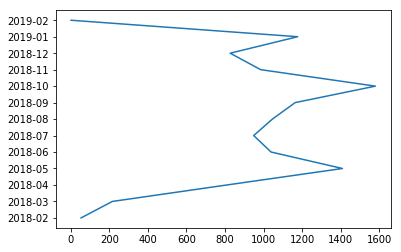

In [51]:

plt.plot(y,x)
plt.show()

In [ ]:
data1

In [ ]:
Hardware_software=[]
complaints=[]
for i in range(len(data1)):
    Hardware_software.append(data1.index[i])
    complaints.append(data1.values[i])

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Hardware_software
sizes = complaints
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("HW v/s SW ")
plt.axis('equal')
plt.show()

In [ ]:
data2=df.groupby("Area")["Area"].count()
data2=data2.sort_values(ascending=False)

In [ ]:
field=[]
complaints=[]
for i in range(len(data2)):
    field.append(data2.index[i])
    complaints.append(data2.values[i])

In [ ]:
plt.style.use('ggplot')

objects = field[0:6]
y_pos = np.arange(len(objects))
performance = complaints[0:6]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Complaints')
plt.title('Field v/s Complaints')
plt.show()

In [ ]:
data3=df.groupby(["Location","Area"])["Area"].count()
data3=data3.sort_values(ascending=False)
data3[0:10]

In [ ]:
data4=df.groupby(["Location","Days"])["Days"].count()
data4=data4.sort_values(ascending=False)
data4[0:10]